# Capstone Project Description 

<b>Part 2: Exploring San Antonio, TX (Bexar County) venues to research where would be a great location to open a restaurant.




# 1. Introduction 
San Antonio is a major city in the United States, let alone Texas with a rapidly growing population. It has a huge variety of restaurants for every taste and, thus, to start a restaurant business in this area is not an easy task.

Our stakeholder is willing to open the beer restaurant in the city of San Antonio. Of course, choosing a location for business is one of the stressful and controversial tasks, since there are a lot of criteria that have to be satisfied in order to achieve the highest revenue. Here are some of them:

the total of current restaurant in the location
population density around the location
population around the location
economic/income of the county itself
...
In this project, we will implement the basic analysis and try to find the most optimal neighborhood to open the  restaurant according to those criteria. It's obvious, that there are many additional factors, such as distance from parking places or distance from the main streets, but this analysis can be done after choosing the neighborhood, and thus will not be done within the scope of this project.

# 2. Data 
# 2.1 Data description
Based on criteria listed above the following data will be utilized in our analysis:

- the number of restaurants within the certain radius of each neighborhood (Foresquare API)
- the net income per person in each city in Texas. Since the restaurant will have middle-high prices, it is important to consider the solvency of population. Source: wikipedia.org
(https://en.wikipedia.org/wiki/List_of_Texas_locations_by_per_capita_income)
- the population data in the entire United States such as the population. Source: simplemaps.com
(https://simplemaps.com/data/us-cities)


<b>Import Libraries that are needed for this project

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [5]:
df = pd.read_excel('uscities.xlsx')
print(df.shape)
df.head()

(28889, 19)


city    city_ascii state_id  state_name  county_fips county_name  \
0   South Creek   South Creek       WA  Washington        53053      Pierce   
1        Roslyn        Roslyn       WA  Washington        53037    Kittitas   
2       Sprague       Sprague       WA  Washington        53043     Lincoln   
3    Gig Harbor    Gig Harbor       WA  Washington        53053      Pierce   
4  Lake Cassidy  Lake Cassidy       WA  Washington        53061   Snohomish   

  county_fips_all county_name_all      lat       lng  population  density  \
0           53053          Pierce  46.9994 -122.3921        2500    125.0   
1           53037        Kittitas  47.2507 -121.0989         947     84.0   
2           53043         Lincoln  47.3048 -117.9713         441    163.0   
3           53053          Pierce  47.3352 -122.5968        9507    622.0   
4           53061       Snohomish  48.0639 -122.0920        3591    131.0   

    source  military  incorporated             timezone  ranking  \
0  polygon     False          True  America/Los_Angeles        3   
1  polygon     False          True  America/Los_Angeles        3   
2  polygon     False          True  America/Los_Angeles        3   
3  polygon     False          True  America/Los_Angeles        3   
4  polygon     False          True  America/Los_Angeles        3   

                zips          id  
0  98580 98387 98338  1840042075  
1  98941 98068 98925  1840019842  
2              99032  1840021107  
3        98332 98335  1840019855  
4  98223 98258 98270  1840041959

In [6]:
df.rename(columns = {'city':'Neighborhood', 'state_id':'State','county_fips':'County_Code'}, inplace = True)
df.head()

Neighborhood    city_ascii State  state_name  County_Code county_name  \
0   South Creek   South Creek    WA  Washington        53053      Pierce   
1        Roslyn        Roslyn    WA  Washington        53037    Kittitas   
2       Sprague       Sprague    WA  Washington        53043     Lincoln   
3    Gig Harbor    Gig Harbor    WA  Washington        53053      Pierce   
4  Lake Cassidy  Lake Cassidy    WA  Washington        53061   Snohomish   

  county_fips_all county_name_all      lat       lng  population  density  \
0           53053          Pierce  46.9994 -122.3921        2500    125.0   
1           53037        Kittitas  47.2507 -121.0989         947     84.0   
2           53043         Lincoln  47.3048 -117.9713         441    163.0   
3           53053          Pierce  47.3352 -122.5968        9507    622.0   
4           53061       Snohomish  48.0639 -122.0920        3591    131.0   

    source  military  incorporated             timezone  ranking  \
0  polygon     False          True  America/Los_Angeles        3   
1  polygon     False          True  America/Los_Angeles        3   
2  polygon     False          True  America/Los_Angeles        3   
3  polygon     False          True  America/Los_Angeles        3   
4  polygon     False          True  America/Los_Angeles        3   

                zips          id  
0  98580 98387 98338  1840042075  
1  98941 98068 98925  1840019842  
2              99032  1840021107  
3        98332 98335  1840019855  
4  98223 98258 98270  1840041959

<b> Drop unnessary columns I don't want in the analysis 

In [7]:
df2 = df.drop(columns =['county_fips_all','county_name_all','military','incorporated','ranking','zips'])
df2.head()


Neighborhood    city_ascii State  state_name  County_Code county_name  \
0   South Creek   South Creek    WA  Washington        53053      Pierce   
1        Roslyn        Roslyn    WA  Washington        53037    Kittitas   
2       Sprague       Sprague    WA  Washington        53043     Lincoln   
3    Gig Harbor    Gig Harbor    WA  Washington        53053      Pierce   
4  Lake Cassidy  Lake Cassidy    WA  Washington        53061   Snohomish   

       lat       lng  population  density   source             timezone  \
0  46.9994 -122.3921        2500    125.0  polygon  America/Los_Angeles   
1  47.2507 -121.0989         947     84.0  polygon  America/Los_Angeles   
2  47.3048 -117.9713         441    163.0  polygon  America/Los_Angeles   
3  47.3352 -122.5968        9507    622.0  polygon  America/Los_Angeles   
4  48.0639 -122.0920        3591    131.0  polygon  America/Los_Angeles   

           id  
0  1840042075  
1  1840019842  
2  1840021107  
3  1840019855  
4  1840041959

In [8]:
print(df2.shape)

(28889, 13)


In [9]:
# amount of income
url = 'https://en.wikipedia.org/wiki/List_of_Texas_locations_by_per_capita_income'
list_df = pd.read_html(url, header = 0)
df_income = list_df[1]
df_income.head()

Rank   County Per capitaincome Medianhouseholdincome Medianfamilyincome  \
0   1.0   Collin          $42,220               $83,889            $84,306   
1   2.0   Borden          $40,916               $58,409            $60,536   
2   3.0     King          $39,511               $61,563            $80,500   
3   4.0   Loving          $37,362               $80,504            $94,785   
4   5.0  Kendall          $36,418               $66,655            $80,801   

   Population  Number ofhouseholds  
0      782341               181970  
1         641                  264  
2         286                  113  
3         134                   31  
4       33410                12617

In [10]:
#dropping columns and renaming columns 
df_income.rename(columns = {'df_income':'per captia income', 'Medianhouseholdincome':'median household income','Medianfamilyincome':'median family income'}, inplace = True)
df_income = df_income.drop(columns =['Population','Number ofhouseholds'])
df_income.head()


Rank   County Per capitaincome median household income median family income
0   1.0   Collin          $42,220                 $83,889              $84,306
1   2.0   Borden          $40,916                 $58,409              $60,536
2   3.0     King          $39,511                 $61,563              $80,500
3   4.0   Loving          $37,362                 $80,504              $94,785
4   5.0  Kendall          $36,418                 $66,655              $80,801

In [11]:
# merging income data to the population data 
df3 = df2.join(df_income.set_index('County'), on='county_name')
df3.head()

Neighborhood    city_ascii State  state_name  County_Code county_name  \
0   South Creek   South Creek    WA  Washington        53053      Pierce   
1        Roslyn        Roslyn    WA  Washington        53037    Kittitas   
2       Sprague       Sprague    WA  Washington        53043     Lincoln   
3    Gig Harbor    Gig Harbor    WA  Washington        53053      Pierce   
4  Lake Cassidy  Lake Cassidy    WA  Washington        53061   Snohomish   

       lat       lng  population  density   source             timezone  \
0  46.9994 -122.3921        2500    125.0  polygon  America/Los_Angeles   
1  47.2507 -121.0989         947     84.0  polygon  America/Los_Angeles   
2  47.3048 -117.9713         441    163.0  polygon  America/Los_Angeles   
3  47.3352 -122.5968        9507    622.0  polygon  America/Los_Angeles   
4  48.0639 -122.0920        3591    131.0  polygon  America/Los_Angeles   

           id  Rank Per capitaincome median household income  \
0  1840042075   NaN              NaN                     NaN   
1  1840019842   NaN              NaN                     NaN   
2  1840021107   NaN              NaN                     NaN   
3  1840019855   NaN              NaN                     NaN   
4  1840041959   NaN              NaN                     NaN   

  median family income  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [12]:
# filtering out data to only show Texas

TX_data = df3[df3.State == 'TX']

TX_data.head(10)

Neighborhood               city_ascii State state_name  \
4132                  Trenton                  Trenton    TX      Texas   
4133                 Cuevitas                 Cuevitas    TX      Texas   
4134             Union Valley             Union Valley    TX      Texas   
4135                 Brazoria                 Brazoria    TX      Texas   
4136                   Strawn                   Strawn    TX      Texas   
4137               Lake Kiowa               Lake Kiowa    TX      Texas   
4138  Homestead Meadows South  Homestead Meadows South    TX      Texas   
4139          Del Mar Heights          Del Mar Heights    TX      Texas   
4140                  Sanford                  Sanford    TX      Texas   
4141         Oak Trail Shores         Oak Trail Shores    TX      Texas   

      County_Code county_name      lat       lng  population  density  \
4132        48147      Fannin  33.4275  -96.3407         646    133.0   
4133        48215     Hidalgo  26.2585  -98.5787           0      0.0   
4134        48231        Hunt  32.9324  -96.2471         372     79.0   
4135        48039    Brazoria  29.0455  -95.5673        4012    442.0   
4136        48363  Palo Pinto  32.5509  -98.4979         654    324.0   
4137        48097       Cooke  33.5703  -97.0129        2119    274.0   
4138        48141     El Paso  31.8110 -106.1643        6460    680.0   
4139        48061     Cameron  26.0566  -97.4235         135    115.0   
4140        48233  Hutchinson  35.7026 -101.5317         159    459.0   
4141        48221        Hood  32.4885  -97.8357        3233    491.0   

       source         timezone          id   Rank Per capitaincome  \
4132  polygon  America/Chicago  1840021973  150.0          $20,221   
4133  polygon  America/Chicago  1840036212  247.0          $13,480   
4134  polygon  America/Chicago  1840022996  111.0          $21,646   
4135  polygon  America/Chicago  1840019673   26.0          $27,529   
4136  polygon  America/Chicago  1840022039  115.0          $21,551   
4137  polygon  America/Chicago  1840017998   65.0          $23,598   
4138  polygon   America/Denver  1840073263  216.0          $16,768   
4139  polygon  America/Chicago  1840037041  245.0          $13,695   
4140  polygon  America/Chicago  1840022707  128.0          $21,075   
4141  polygon  America/Chicago  1840019459   15.0          $30,687   

     median household income median family income  
4132                 $44,551              $55,083  
4133                 $31,879              $34,106  
4134                 $43,101              $52,975  
4135                 $65,607              $76,018  
4136                 $41,095              $48,655  
4137                 $48,899              $57,689  
4138                 $36,333              $40,329  
4139                 $31,264              $33,770  
4140                 $42,213              $50,255  
4141                 $54,882              $65,844

In [13]:
TX_data.shape
print('The dataframe has', TX_data.shape, 'rows and columns respectively.')

The dataframe has (1718, 17) rows and columns respectively.


#THIS WOULD BE USED IF I WANTED TO EXCLUDE ANY COLUMNS, IN OUR CASE WE DO NOT!

cols = [0,2,3,5,6,8]

TX_data = TX_data[TX_data.columns[cols]]

TX_data.head().reset_index()

# Now we are going to start segmenting by County:

Will start by taking one coordinates first.

In [14]:
#Let's determine the address of one location in Texas, USA.¶

address = '18000 Bandera Rd, Helotes, TX 78023'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 18000 Bandera Rd, Helotes, TX 78023 is {}, {}.'.format(latitude, longitude))


/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of 18000 Bandera Rd, Helotes, TX 78023 is 29.612820919480253, -98.72071194309557.


# Install and import FOLIUM for our project
Great visualization library.




In [15]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [16]:
#create map of Texas using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)


In [18]:
# add markers to map
# add markers to map
for lat, lng, city, county_name in zip(TX_data['lat'], TX_data['lng'], TX_data['Neighborhood'], TX_data['county_name']):
    label = '{}, {}'.format(county_name, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

#note: ran into extreme issues because the dataset was not created properly. In code line 134 we needed to define
# the columns to "TX_data"

In [19]:
#map.save('screenAreGrab.png',format='png')
map.save('map.html')

# Segmenting Bexar
Now we will segment our first county to compare and cluster only the neighborhoods in Bexar County. This is completed by slicing the original dataframe and create a new dataframe of the <b> Bexar County only.

In [20]:
bexar_data = TX_data[TX_data.county_name == 'Bexar']
bexar_data.drop(bexar_data.index[2], inplace=True)
print('The dataframe has', bexar_data.shape, 'rows and columns respectively.')
bexar_data.reset_index()

The dataframe has (30, 17) rows and columns respectively.


/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


index          Neighborhood            city_ascii State state_name  \
0    4216              Live Oak              Live Oak    TX      Texas   
1    4396         Alamo Heights         Alamo Heights    TX      Texas   
2    4537             Windcrest             Windcrest    TX      Texas   
3    4549              Converse              Converse    TX      Texas   
4    4557          Lackland AFB          Lackland AFB    TX      Texas   
5    4576           San Antonio           San Antonio    TX      Texas   
6    4609              Von Ormy              Von Ormy    TX      Texas   
7    4653               Macdona               Macdona    TX      Texas   
8    4716           Grey Forest           Grey Forest    TX      Texas   
9    4733        Cross Mountain        Cross Mountain    TX      Texas   
10   4876      Balcones Heights      Balcones Heights    TX      Texas   
11   4930                 Kirby                 Kirby    TX      Texas   
12   4931                 Selma                 Selma    TX      Texas   
13   4986              Somerset              Somerset    TX      Texas   
14   5090        Hollywood Park        Hollywood Park    TX      Texas   
15   5104  Hill Country Village  Hill Country Village    TX      Texas   
16   5217       Timberwood Park       Timberwood Park    TX      Texas   
17   5279           Leon Valley           Leon Valley    TX      Texas   
18   5289         Terrell Hills         Terrell Hills    TX      Texas   
19   5421          Randolph AFB          Randolph AFB    TX      Texas   
20   5427       Fair Oaks Ranch       Fair Oaks Ranch    TX      Texas   
21   5442            St. Hedwig            St. Hedwig    TX      Texas   
22   5500               Helotes               Helotes    TX      Texas   
23   5507             Elmendorf             Elmendorf    TX      Texas   
24   5703           China Grove           China Grove    TX      Texas   
25   5705            Sandy Oaks            Sandy Oaks    TX      Texas   
26   5741          Castle Hills          Castle Hills    TX      Texas   
27   5753           Scenic Oaks           Scenic Oaks    TX      Texas   
28   5761        Universal City        Universal City    TX      Texas   
29   5797          Shavano Park          Shavano Park    TX      Texas   

    County_Code county_name      lat      lng  population  density   source  \
0         48029       Bexar  29.5545 -98.3404       15820   1284.0  polygon   
1         48029       Bexar  29.4828 -98.4681        8413   1764.0  polygon   
2         48029       Bexar  29.5148 -98.3819        5866   1051.0  polygon   
3         48029       Bexar  29.5091 -98.3084       23375   1067.0  polygon   
4         48029       Bexar  29.3866 -98.6179        6537    594.0  polygon   
5         48029       Bexar  29.4658 -98.5254     2002530   1204.0  polygon   
6         48029       Bexar  29.2802 -98.6557        1275    260.0  polygon   
7         48029       Bexar  29.3205 -98.6973         270     67.0  polygon   
8         48029       Bexar  29.6169 -98.6833         540    290.0  polygon   
9         48029       Bexar  29.6535 -98.6564        3566    204.0  polygon   
10        48029       Bexar  29.4899 -98.5502        3277   2003.0  polygon   
11        48029       Bexar  29.4611 -98.3860        8705   1739.0  polygon   
12        48029       Bexar  29.5865 -98.3134       10712    818.0  polygon   
13        48029       Bexar  29.2285 -98.6567        1859    359.0  polygon   
14        48029       Bexar  29.5995 -98.4840        3365    886.0  polygon   
15        48029       Bexar  29.5831 -98.4891        1084    193.0  polygon   
16        48029       Bexar  29.6994 -98.4838       26236    496.0  polygon   
17        48029       Bexar  29.4954 -98.6142       11426   1292.0  polygon   
18        48029       Bexar  29.4771 -98.4471        5397   1270.0  polygon   
19        48029       Bexar  29.5301 -98.2787        1118    104.0  polygon   
20        48029       Bexar  29.7468 -98.6375     

In [21]:
bexar_data = bexar_data.iloc[ :13]
bexar_data.drop(bexar_data.index[2], inplace=True)
print('The dataframe has', bexar_data.shape, 'rows and columns respectively.')
bexar_data.reset_index()
bexar_data

The dataframe has (12, 17) rows and columns respectively.


Neighborhood        city_ascii State state_name  County_Code  \
4216          Live Oak          Live Oak    TX      Texas        48029   
4396     Alamo Heights     Alamo Heights    TX      Texas        48029   
4549          Converse          Converse    TX      Texas        48029   
4557      Lackland AFB      Lackland AFB    TX      Texas        48029   
4576       San Antonio       San Antonio    TX      Texas        48029   
4609          Von Ormy          Von Ormy    TX      Texas        48029   
4653           Macdona           Macdona    TX      Texas        48029   
4716       Grey Forest       Grey Forest    TX      Texas        48029   
4733    Cross Mountain    Cross Mountain    TX      Texas        48029   
4876  Balcones Heights  Balcones Heights    TX      Texas        48029   
4930             Kirby             Kirby    TX      Texas        48029   
4931             Selma             Selma    TX      Texas        48029   

     county_name      lat      lng  population  density   source  \
4216       Bexar  29.5545 -98.3404       15820   1284.0  polygon   
4396       Bexar  29.4828 -98.4681        8413   1764.0  polygon   
4549       Bexar  29.5091 -98.3084       23375   1067.0  polygon   
4557       Bexar  29.3866 -98.6179        6537    594.0  polygon   
4576       Bexar  29.4658 -98.5254     2002530   1204.0  polygon   
4609       Bexar  29.2802 -98.6557        1275    260.0  polygon   
4653       Bexar  29.3205 -98.6973         270     67.0  polygon   
4716       Bexar  29.6169 -98.6833         540    290.0  polygon   
4733       Bexar  29.6535 -98.6564        3566    204.0  polygon   
4876       Bexar  29.4899 -98.5502        3277   2003.0  polygon   
4930       Bexar  29.4611 -98.3860        8705   1739.0  polygon   
4931       Bexar  29.5865 -98.3134       10712    818.0  polygon   

             timezone          id  Rank Per capitaincome  \
4216  America/Chicago  1840020960  72.0          $23,225   
4396  America/Chicago  1840019653  72.0          $23,225   
4549  America/Chicago  1840019655  72.0          $23,225   
4557  America/Chicago  1840074237  72.0          $23,225   
4576  America/Chicago  1840022220  72.0          $23,225   
4609  America/Chicago  1840023093  72.0          $23,225   
4653  America/Chicago  1840026039  72.0          $23,225   
4716  America/Chicago  1840020956  72.0          $23,225   
4733  America/Chicago  1840018268  72.0          $23,225   
4876  America/Chicago  1840019654  72.0          $23,225   
4930  America/Chicago  1840020962  72.0          $23,225   
4931  America/Chicago  1840022221  72.0          $23,225   

     median household income median family income  
4216                 $47,048              $55,715  
4396                 $47,048              $55,715  
4549                 $47,048              $55,715  
4557                 $47,048              $55,715  
4576                 $47,048              $55,715  
4609                 $47,048              $55,715  
4653                 $47,048              $55,715  
4716                 $47,048              $55,715  
4733                 $47,048              $55,715  
4876                 $47,048              $55,715  
4930                 $47,048              $55,715  
4931                 $47,048              $55,715

<b> Use geopy library to get the latitude and longitude values of Bexar County.


In [22]:
address = 'Bexar, TX'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bexar, TX are {}, {}.'.format(latitude, longitude))

/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Bexar, TX are 29.4263987, -98.5104781.


In [23]:
map_bexar = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bexar_data['lat'], bexar_data['lng'], bexar_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_bexar)  
    
map_bexar

In [24]:
#fig.savefig('map_bexar')

# Bexar County Neighborhood Cluster
Now, the next thing to do is to utilize the Foursquare API to explore the wake county neighborhoods and segment them.



<b>Defining Foursquare Credentials and Version


In [25]:
CLIENT_ID = 'FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P' #Foursquare ID
CLIENT_SECRET = 'X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P
CLIENT_SECRET:X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A


Exploring the first neighborhood in the Bexar County dataframe.


In [26]:
bexar_data.loc[4216,'Neighborhood']
print('The first neighborhood is', bexar_data.loc[4216,'Neighborhood'])

The first neighborhood is Live Oak


# Capturing the First Neighborhoods Coordinates

In [27]:
neighborhood_latitude = bexar_data.loc[4216, 'lat'] # neighborhood latitude value
neighborhood_longitude = bexar_data.loc[4216, 'lng'] # neighborhood longitude value

neighborhood_name = bexar_data.loc[4216, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Live Oak are 29.5545, -98.3404.


Now, let's get the top 100 venues that are in Live Oak within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [28]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P&client_secret=X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A&v=20180605&ll=29.5545,-98.3404&radius=500&limit=100'

In [29]:
results = requests.get(url).json()
#results

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Now json is cleaned and the and structured into a pandas dataframe.

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name       categories        lat       lng
0  World Car Nissan  Auto Dealership  29.557071 -98.34443

In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


1 venues were returned by Foursquare.


# Bexar County Neighborhood Exploration
Let's create a function to collect the venues to all the neighborhoods in Bexar County

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let's write the code to run the above function on each neighborhood and create a new dataframe called Bexar County_venues.


In [34]:
bexar_venues = getNearbyVenues(names=bexar_data['Neighborhood'],
                                   latitudes=bexar_data['lat'],
                                   longitudes=bexar_data['lng']
                                  )

Live Oak
Alamo Heights
Converse
Lackland AFB
San Antonio
Von Ormy
Macdona
Grey Forest
Cross Mountain
Balcones Heights
Kirby
Selma


In [38]:
print('There are', bexar_venues.shape, 'rows and columns of venues and neighborhoods in Bexar County.')
bexar_venues.head(100)

There are (101, 7) rows and columns of venues and neighborhoods in Bexar County.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           Live Oak                29.5545                -98.3404   
1      Alamo Heights                29.4828                -98.4681   
2      Alamo Heights                29.4828                -98.4681   
3      Alamo Heights                29.4828                -98.4681   
4      Alamo Heights                29.4828                -98.4681   
5      Alamo Heights                29.4828                -98.4681   
6      Alamo Heights                29.4828                -98.4681   
7           Converse                29.5091                -98.3084   
8           Converse                29.5091                -98.3084   
9           Converse                29.5091                -98.3084   
10          Converse                29.5091                -98.3084   
11          Converse                29.5091                -98.3084   
12          Converse                29.5091                -98.3084   
13          Converse                29.5091                -98.3084   
14          Converse                29.5091                -98.3084   
15          Converse                29.5091                -98.3084   
16          Converse                29.5091                -98.3084   
17          Converse                29.5091                -98.3084   
18          Converse                29.5091                -98.3084   
19          Converse                29.5091                -98.3084   
20          Converse                29.5091                -98.3084   
21          Converse                29.5091                -98.3084   
22          Converse                29.5091                -98.3084   
23          Converse                29.5091                -98.3084   
24          Converse                29.5091                -98.3084   
25          Converse                29.5091                -98.3084   
26          Converse                29.5091                -98.3084   
27      Lackland AFB                29.3866                -98.6179   
28      Lackland AFB                29.3866                -98.6179   
29      Lackland AFB                29.3866                -98.6179   
30      Lackland AFB                29.3866                -98.6179   
31      Lackland AFB                29.3866                -98.6179   
32      Lackland AFB                29.3866                -98.6179   
33      Lackland AFB                29.3866                -98.6179   
34      Lackland AFB                29.3866                -98.6179   
35      Lackland AFB                29.3866                -98.6179   
36      Lackland AFB                29.3866                -98.6179   
37      Lackland AFB                29.3866                -98.6179   
38       San Antonio                29.4658                -98.5254   
39       San Antonio                29.4658                -98.5254   
40       San Antonio                29.4658                -98.5254   
41       San Antonio                29.4658                -98.5254   
42       San Antonio                29.4658                -98.5254   
43       San Antonio                29.4658                -98.5254   
44       San Antonio                29.4658                -98.5254   
45       San Antonio                29.4658                -98.5254   
46       San Antonio                29.4658                -98.5254   
47       San Antonio                29.4658                -98.5254   
48       San Antonio                29.4658                -98.5254   
49       San Antonio                29.4658                -98.5254   
50       San Antonio                29.4658                -98.5254   
51          Von Ormy                29.2802                -98.6557   
52       Grey Forest                29.6169                -98.6833   
53       Grey Forest                29.6169                -98.6833   
54  Balcones Heights                29.4899                -98.5502   
55  Balcones Heights            

Text(0, 0.5, 'Venue Count')

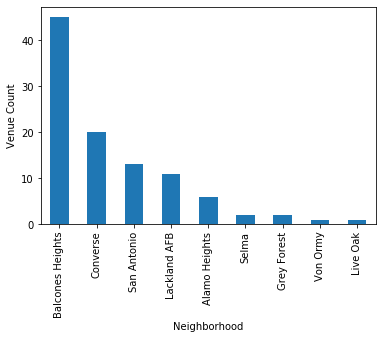

In [39]:
plot1=bexar_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Let's check how many venues were returned for each neighborhood



In [40]:
venue_counts = bexar_venues.groupby('Neighborhood').count()
venue_counts

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                             
Alamo Heights                         6                       6      6   
Balcones Heights                     45                      45     45   
Converse                             20                      20     20   
Grey Forest                           2                       2      2   
Lackland AFB                         11                      11     11   
Live Oak                              1                       1      1   
San Antonio                          13                      13     13   
Selma                                 2                       2      2   
Von Ormy                              1                       1      1   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                       
Alamo Heights                  6                6               6  
Balcones Heights              45               45              45  
Converse                      20               20              20  
Grey Forest                    2                2               2  
Lackland AFB                  11               11              11  
Live Oak                       1                1               1  
San Antonio                   13               13              13  
Selma                          2                2               2  
Von Ormy                       1                1               1

Let's find out how many unique categories can be curated from all the returned venues


In [41]:
print('There are {} uniques categories.'.format(len(bexar_venues['Venue Category'].unique())))


There are 56 uniques categories.


In [42]:
bexar_venues[(bexar_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Bakery', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Coffee Shop', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Place', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Joint', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Ice Cream Shop', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Food Service', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Breakfast Spot', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Frozen Yogurt Shop', regex=False))].count()


Neighborhood              43
Neighborhood Latitude     43
Neighborhood Longitude    43
Venue                     43
Venue Latitude            43
Venue Longitude           43
Venue Category            43
dtype: int64

In [43]:
bexar_restaurant = bexar_venues[(bexar_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Bakery', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Coffee Shop', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Place', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Joint', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Ice Cream Shop', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Food Service', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Breakfast Spot', regex=False)) |
                 (bexar_venues['Venue Category'].str.contains('Frozen Yogurt Shop', regex=False))].groupby(['Neighborhood']).count()
bexar_restaurant.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
bexar_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
bexar_restaurant.head()


Number of restaurants
Neighborhood                           
Alamo Heights                         4
Balcones Heights                     15
Converse                             11
Grey Forest                           1
Lackland AFB                          3

In [44]:
# join above dataframe to the main df
bexar_complete_data = bexar_data.join(bexar_restaurant, on='Neighborhood')
bexar_complete_data.head(20)

Neighborhood        city_ascii State state_name  County_Code  \
4216          Live Oak          Live Oak    TX      Texas        48029   
4396     Alamo Heights     Alamo Heights    TX      Texas        48029   
4549          Converse          Converse    TX      Texas        48029   
4557      Lackland AFB      Lackland AFB    TX      Texas        48029   
4576       San Antonio       San Antonio    TX      Texas        48029   
4609          Von Ormy          Von Ormy    TX      Texas        48029   
4653           Macdona           Macdona    TX      Texas        48029   
4716       Grey Forest       Grey Forest    TX      Texas        48029   
4733    Cross Mountain    Cross Mountain    TX      Texas        48029   
4876  Balcones Heights  Balcones Heights    TX      Texas        48029   
4930             Kirby             Kirby    TX      Texas        48029   
4931             Selma             Selma    TX      Texas        48029   

     county_name      lat      lng  population  density   source  \
4216       Bexar  29.5545 -98.3404       15820   1284.0  polygon   
4396       Bexar  29.4828 -98.4681        8413   1764.0  polygon   
4549       Bexar  29.5091 -98.3084       23375   1067.0  polygon   
4557       Bexar  29.3866 -98.6179        6537    594.0  polygon   
4576       Bexar  29.4658 -98.5254     2002530   1204.0  polygon   
4609       Bexar  29.2802 -98.6557        1275    260.0  polygon   
4653       Bexar  29.3205 -98.6973         270     67.0  polygon   
4716       Bexar  29.6169 -98.6833         540    290.0  polygon   
4733       Bexar  29.6535 -98.6564        3566    204.0  polygon   
4876       Bexar  29.4899 -98.5502        3277   2003.0  polygon   
4930       Bexar  29.4611 -98.3860        8705   1739.0  polygon   
4931       Bexar  29.5865 -98.3134       10712    818.0  polygon   

             timezone          id  Rank Per capitaincome  \
4216  America/Chicago  1840020960  72.0          $23,225   
4396  America/Chicago  1840019653  72.0          $23,225   
4549  America/Chicago  1840019655  72.0          $23,225   
4557  America/Chicago  1840074237  72.0          $23,225   
4576  America/Chicago  1840022220  72.0          $23,225   
4609  America/Chicago  1840023093  72.0          $23,225   
4653  America/Chicago  1840026039  72.0          $23,225   
4716  America/Chicago  1840020956  72.0          $23,225   
4733  America/Chicago  1840018268  72.0          $23,225   
4876  America/Chicago  1840019654  72.0          $23,225   
4930  America/Chicago  1840020962  72.0          $23,225   
4931  America/Chicago  1840022221  72.0          $23,225   

     median household income median family income  Number of restaurants  
4216                 $47,048              $55,715                    NaN  
4396                 $47,048              $55,715                    4.0  
4549                 $47,048              $55,715                   11.0  
4557                 $47,048              $55,715                    3.0  
4576                 $47,048              $55,715                    8.0  
4609                 $47,048              $55,715                    1.0  
4653                 $47,048              $55,715                    NaN  
4716                 $47,048              $55,715                    1.0  
4733                 $47,048              $55,715                    NaN  
4876                 $47,048              $55,715                   15.0  
4930                 $47,048              $55,715                    NaN  
4931                 $47,048              $55,715                    NaN

<b>Note:

Looking at the dataframe we see that there are some areas in the table that have restaurants and some that do not. 

We could assume that there are no restaurants or perhaps this is an error and add the average of the restaurants counted.

In this scenario I am going to just assume there is no restaurants. 

In [45]:
#changing the n/a data into 0 

bexar_data2 = bexar_complete_data.fillna(0)
#df[['Number of restaurants']]
bexar_data2.head(23)

Neighborhood        city_ascii State state_name  County_Code  \
4216          Live Oak          Live Oak    TX      Texas        48029   
4396     Alamo Heights     Alamo Heights    TX      Texas        48029   
4549          Converse          Converse    TX      Texas        48029   
4557      Lackland AFB      Lackland AFB    TX      Texas        48029   
4576       San Antonio       San Antonio    TX      Texas        48029   
4609          Von Ormy          Von Ormy    TX      Texas        48029   
4653           Macdona           Macdona    TX      Texas        48029   
4716       Grey Forest       Grey Forest    TX      Texas        48029   
4733    Cross Mountain    Cross Mountain    TX      Texas        48029   
4876  Balcones Heights  Balcones Heights    TX      Texas        48029   
4930             Kirby             Kirby    TX      Texas        48029   
4931             Selma             Selma    TX      Texas        48029   

     county_name      lat      lng  population  density   source  \
4216       Bexar  29.5545 -98.3404       15820   1284.0  polygon   
4396       Bexar  29.4828 -98.4681        8413   1764.0  polygon   
4549       Bexar  29.5091 -98.3084       23375   1067.0  polygon   
4557       Bexar  29.3866 -98.6179        6537    594.0  polygon   
4576       Bexar  29.4658 -98.5254     2002530   1204.0  polygon   
4609       Bexar  29.2802 -98.6557        1275    260.0  polygon   
4653       Bexar  29.3205 -98.6973         270     67.0  polygon   
4716       Bexar  29.6169 -98.6833         540    290.0  polygon   
4733       Bexar  29.6535 -98.6564        3566    204.0  polygon   
4876       Bexar  29.4899 -98.5502        3277   2003.0  polygon   
4930       Bexar  29.4611 -98.3860        8705   1739.0  polygon   
4931       Bexar  29.5865 -98.3134       10712    818.0  polygon   

             timezone          id  Rank Per capitaincome  \
4216  America/Chicago  1840020960  72.0          $23,225   
4396  America/Chicago  1840019653  72.0          $23,225   
4549  America/Chicago  1840019655  72.0          $23,225   
4557  America/Chicago  1840074237  72.0          $23,225   
4576  America/Chicago  1840022220  72.0          $23,225   
4609  America/Chicago  1840023093  72.0          $23,225   
4653  America/Chicago  1840026039  72.0          $23,225   
4716  America/Chicago  1840020956  72.0          $23,225   
4733  America/Chicago  1840018268  72.0          $23,225   
4876  America/Chicago  1840019654  72.0          $23,225   
4930  America/Chicago  1840020962  72.0          $23,225   
4931  America/Chicago  1840022221  72.0          $23,225   

     median household income median family income  Number of restaurants  
4216                 $47,048              $55,715                    0.0  
4396                 $47,048              $55,715                    4.0  
4549                 $47,048              $55,715                   11.0  
4557                 $47,048              $55,715                    3.0  
4576                 $47,048              $55,715                    8.0  
4609                 $47,048              $55,715                    1.0  
4653                 $47,048              $55,715                    0.0  
4716                 $47,048              $55,715                    1.0  
4733                 $47,048              $55,715                    0.0  
4876                 $47,048              $55,715                   15.0  
4930                 $47,048              $55,715                    0.0  
4931                 $47,048              $55,715                    0.0

# 3. Methodology and Analysis 
After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the most optimal neighborhood. Firstly, we will apply some basic exploratory analysis to our data. For that let's find the location of each neighborhood on the map. Then we can visually inspect some values in our data with the help of bar charts. Secondly, we have the possibility to reduce the number features in data frame by replacing them with more reasonable data. Finally, we will perform cluster analysis to find the best cluster of neighborhood with meaningful features.

<b> 3.1 Exploratory Data Analysis
Let's first derive some basic statistical values of our data.

In [46]:
bexar_data2.describe()

County_Code        lat        lng    population      density  \
count         12.0  12.000000  12.000000  1.200000e+01    12.000000   
mean       48029.0  29.483950 -98.516875  1.737517e+05   941.166667   
std            0.0   0.113275   0.149513  5.759559e+05   672.499792   
min        48029.0  29.280200 -98.697300  2.700000e+02    67.000000   
25%        48029.0  29.442475 -98.655875  2.776500e+03   282.500000   
50%        48029.0  29.486350 -98.537800  7.475000e+03   942.500000   
75%        48029.0  29.562500 -98.374600  1.198900e+04  1397.750000   
max        48029.0  29.653500 -98.308400  2.002530e+06  2003.000000   

                 id  Rank  Number of restaurants  
count  1.200000e+01  12.0              12.000000  
mean   1.840026e+09  72.0               3.583333  
std    1.543098e+04   0.0               5.071459  
min    1.840018e+09  72.0               0.000000  
25%    1.840020e+09  72.0               0.000000  
50%    1.840021e+09  72.0               1.000000  
75%    1.840022e+09  72.0               5.000000  
max    1.840074e+09  72.0              15.000000

It's also would be useful to visualize the center locations of each neighborhood. For that, we need to create a map of Bexar county with neighborhoods superimposed on top.

In [47]:
# create map of Bexar County using latitude and longitude values
map_bexar2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(bexar_data2['lat'], bexar_data2['lng'], bexar_data2['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bexar2)  
    
map_bexar2

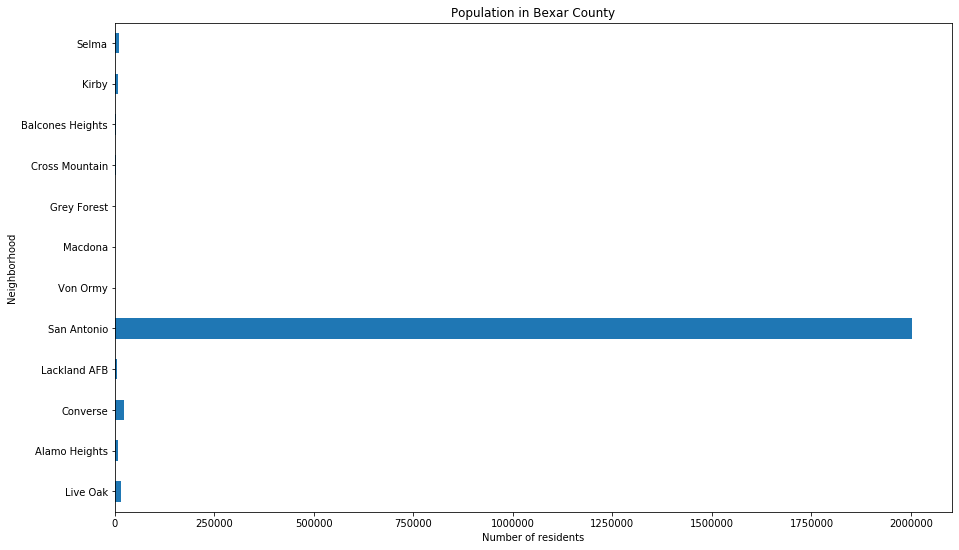

In [48]:
import matplotlib.pyplot as plt
# step 2: plot data
bexar_data2[['Neighborhood', 'population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of residents') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population in Bexar County') # add title to the plot
plt.yticks (np.arange(12), bexar_data2['Neighborhood'])
plt.show()

In [49]:
bexar_data3 = bexar_data2.drop(columns =['State','state_name','County_Code','lat','lng','source','timezone','id','Rank',])
bexar_data3.head(15)

Neighborhood        city_ascii county_name  population  density  \
4216          Live Oak          Live Oak       Bexar       15820   1284.0   
4396     Alamo Heights     Alamo Heights       Bexar        8413   1764.0   
4549          Converse          Converse       Bexar       23375   1067.0   
4557      Lackland AFB      Lackland AFB       Bexar        6537    594.0   
4576       San Antonio       San Antonio       Bexar     2002530   1204.0   
4609          Von Ormy          Von Ormy       Bexar        1275    260.0   
4653           Macdona           Macdona       Bexar         270     67.0   
4716       Grey Forest       Grey Forest       Bexar         540    290.0   
4733    Cross Mountain    Cross Mountain       Bexar        3566    204.0   
4876  Balcones Heights  Balcones Heights       Bexar        3277   2003.0   
4930             Kirby             Kirby       Bexar        8705   1739.0   
4931             Selma             Selma       Bexar       10712    818.0   

     Per capitaincome median household income median family income  \
4216          $23,225                 $47,048              $55,715   
4396          $23,225                 $47,048              $55,715   
4549          $23,225                 $47,048              $55,715   
4557          $23,225                 $47,048              $55,715   
4576          $23,225                 $47,048              $55,715   
4609          $23,225                 $47,048              $55,715   
4653          $23,225                 $47,048              $55,715   
4716          $23,225                 $47,048              $55,715   
4733          $23,225                 $47,048              $55,715   
4876          $23,225                 $47,048              $55,715   
4930          $23,225                 $47,048              $55,715   
4931          $23,225                 $47,048              $55,715   

      Number of restaurants  
4216                    0.0  
4396                    4.0  
4549                   11.0  
4557                    3.0  
4576                    8.0  
4609                    1.0  
4653                    0.0  
4716                    1.0  
4733                    0.0  
4876                   15.0  
4930                    0.0  
4931                    0.0

In [50]:
# data organization

sort_by_population = bexar_data3.sort_values('population',ascending=False)
sort_by_population

Neighborhood        city_ascii county_name  population  density  \
4576       San Antonio       San Antonio       Bexar     2002530   1204.0   
4549          Converse          Converse       Bexar       23375   1067.0   
4216          Live Oak          Live Oak       Bexar       15820   1284.0   
4931             Selma             Selma       Bexar       10712    818.0   
4930             Kirby             Kirby       Bexar        8705   1739.0   
4396     Alamo Heights     Alamo Heights       Bexar        8413   1764.0   
4557      Lackland AFB      Lackland AFB       Bexar        6537    594.0   
4733    Cross Mountain    Cross Mountain       Bexar        3566    204.0   
4876  Balcones Heights  Balcones Heights       Bexar        3277   2003.0   
4609          Von Ormy          Von Ormy       Bexar        1275    260.0   
4716       Grey Forest       Grey Forest       Bexar         540    290.0   
4653           Macdona           Macdona       Bexar         270     67.0   

     Per capitaincome median household income median family income  \
4576          $23,225                 $47,048              $55,715   
4549          $23,225                 $47,048              $55,715   
4216          $23,225                 $47,048              $55,715   
4931          $23,225                 $47,048              $55,715   
4930          $23,225                 $47,048              $55,715   
4396          $23,225                 $47,048              $55,715   
4557          $23,225                 $47,048              $55,715   
4733          $23,225                 $47,048              $55,715   
4876          $23,225                 $47,048              $55,715   
4609          $23,225                 $47,048              $55,715   
4716          $23,225                 $47,048              $55,715   
4653          $23,225                 $47,048              $55,715   

      Number of restaurants  
4576                    8.0  
4549                   11.0  
4216                    0.0  
4931                    0.0  
4930                    0.0  
4396                    4.0  
4557                    3.0  
4733                    0.0  
4876                   15.0  
4609                    1.0  
4716                    1.0  
4653                    0.0

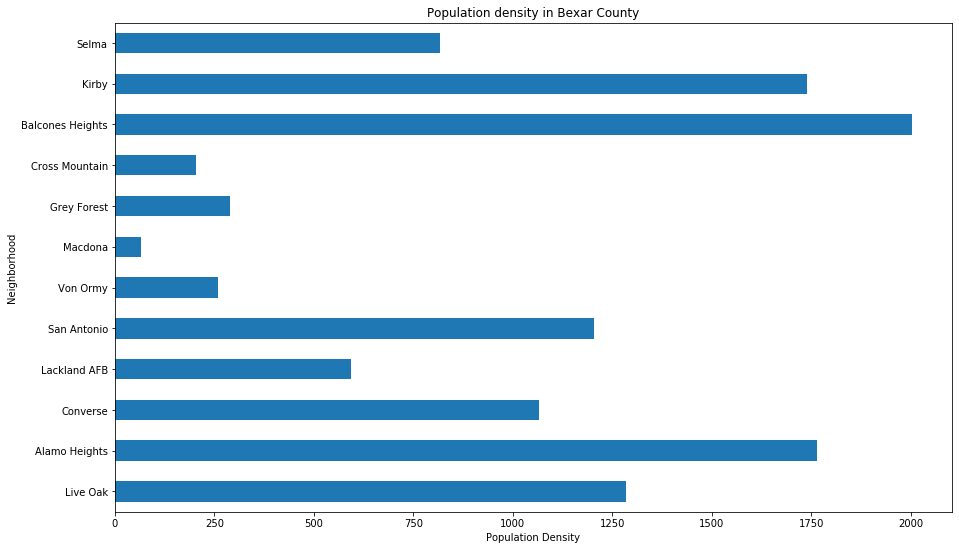

In [147]:
# step 2: plot data
bexar_data2[['Neighborhood', 'density']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population density in Bexar County') # add title to the plot
plt.yticks (np.arange(12), bexar_data2['Neighborhood'])
plt.show()

<b> Note: 
Understanding the per capita of Bexar County and the population density will describe to us he number of people per km² of land area. 
    
This is useful information because it describes that the areas that have the most people in an area and to not be fooled by just how many people live in that neighborhood in general. Therefore, if we open a resturant or anything in that category in the highest density location we would probably have the most foot traffic in our door. 

In [60]:
# organizing data 
bexar_data4 = bexar_data3.drop(columns =['county_name'])
sort_by_density = bexar_data4.sort_values('density',ascending=False)


sort_by_density


Neighborhood        city_ascii  population  density  \
4876  Balcones Heights  Balcones Heights        3277   2003.0   
4396     Alamo Heights     Alamo Heights        8413   1764.0   
4930             Kirby             Kirby        8705   1739.0   
4216          Live Oak          Live Oak       15820   1284.0   
4576       San Antonio       San Antonio     2002530   1204.0   
4549          Converse          Converse       23375   1067.0   
4931             Selma             Selma       10712    818.0   
4557      Lackland AFB      Lackland AFB        6537    594.0   
4716       Grey Forest       Grey Forest         540    290.0   
4609          Von Ormy          Von Ormy        1275    260.0   
4733    Cross Mountain    Cross Mountain        3566    204.0   
4653           Macdona           Macdona         270     67.0   

     Per capitaincome median household income median family income  \
4876          $23,225                 $47,048              $55,715   
4396          $23,225                 $47,048              $55,715   
4930          $23,225                 $47,048              $55,715   
4216          $23,225                 $47,048              $55,715   
4576          $23,225                 $47,048              $55,715   
4549          $23,225                 $47,048              $55,715   
4931          $23,225                 $47,048              $55,715   
4557          $23,225                 $47,048              $55,715   
4716          $23,225                 $47,048              $55,715   
4609          $23,225                 $47,048              $55,715   
4733          $23,225                 $47,048              $55,715   
4653          $23,225                 $47,048              $55,715   

      Number of restaurants  
4876                   15.0  
4396                    4.0  
4930                    0.0  
4216                    0.0  
4576                    8.0  
4549                   11.0  
4931                    0.0  
4557                    3.0  
4716                    1.0  
4609                    1.0  
4733                    0.0  
4653                    0.0

<b> Note:
Now, interestingly we see that the neighborhood with the highest density has the most resturants. It would be recommended that the highest density with the lowest amount of restaurants would be the best suited location to open up the next restaurant in Bexar County, TX

# 4. Results and discussion 

During the analysis, basic data analysis was conducted in order to determine which neighborhood would have the best opportunity to open a restaurant. Based on the analysis one would assume that with a higher population it would be the best area to open a restaurant, however when analyzing the data that was not necessarily the case. The data to understand was the per capita of Bexar County and the population density which describes to us he number of people per km² of land area.

This is useful information because it describes that the areas that have the most people in an area and to not be fooled by just how many people live in that neighborhood in general. Therefore, if we open a resturant or anything in that category in the highest density location we would probably have the most foot traffic in our door

From this we found that Kirby, would be the best option to open a resturant based on population density. 


# 5. Conclusion 

To conclude, the basic data analysis was performed to identify the most optimal neighborhood for the placement of the  restaurant in the county of Bexar, TX. During the analysis, several important statistical features of the neighborhood were explored and visualized and found Kirby as the most attractive options for the further analysis.
